## t-test and survival analysis
* data = OSCC data (using TCGA-HNSC RNAseq data & TARNIC miRNA data)
---

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import seaborn as sns
sns.set(font_scale=1.3)
sns.set_style('white')
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

import numpy as np

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
from lifelines.statistics import logrank_test

In [3]:
clinical = pd.read_csv('./data_bcr_clinical_data_patient.txt', sep='\t')
rnaseq = pd.read_csv('./HNSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', sep='\t', header=None, low_memory=False).T

In [4]:
oscc_m = clinical['Patient Primary Tumor Site'].apply(lambda x: True 
                                                          if x in ['Lip', 'Oral Tongue', 'Floor of mouth', 
                                                                   'Buccal Mucosa', 'Hard Palate', 'Oropharynx', 
                                                                   'Oral Cavity', 'Tonsil'] 
                                                          else False)
clinical = clinical[oscc_m]

In [5]:
clinical['Patient Primary Tumor Site'].unique()

array(['Oral Tongue', 'Floor of mouth', 'Buccal Mucosa', 'Tonsil',
       'Hard Palate', 'Oropharynx', 'Oral Cavity', 'Lip'], dtype=object)

In [7]:
m = clinical['Person Neoplasm Status'] == 'TUMOR FREE'
tf = clinical[m]
t = clinical[-m]

In [8]:
miRNA = pd.read_csv('./HNSCMI_1.TXT', sep='\t', index_col=0, header=None, low_memory=False)

m = miRNA.columns%3 == 2
miRNA = miRNA.loc[:,m].T.drop(columns='miRNA_ID')
miRNA['Hybridization REF'] = miRNA['Hybridization REF'].apply(lambda x: '-'.join(x.split('-')[:3]))
miRNA = miRNA.reset_index(drop=True)

In [10]:
mir133 = miRNA.loc[:,['hsa-mir-133a-1', 'hsa-mir-133a-2', 'hsa-mir-133b']]
mir133.to_csv('./mir133.csv', index=False)

In [12]:
mir133 = pd.read_csv('./mir133.csv')
mir133 = np.log2(mir133+1)

In [13]:
mir133 = pd.concat([miRNA['Hybridization REF'], mir133], axis=1)

In [15]:
clinical2 = pd.merge(clinical, mir133, left_on='Patient Identifier', right_on='Hybridization REF')

In [16]:
rnaseq[0] = rnaseq[0].apply(lambda x: '-'.join(x.split('-')[:3]))

rnaseq.loc[0] = rnaseq.loc[0].apply(lambda x: x.split('|')[0])

rnaseq.columns = rnaseq.iloc[0]

rnaseq.index = rnaseq['Hybridization REF']

rnaseq = rnaseq.drop(['Hybridization REF', 'gene_id'], axis=1)
rnaseq = rnaseq.drop('Hybridization REF')

rnaseq.to_csv('rnaseq_eset.csv')

rnaseq = pd.read_csv('./rnaseq_eset.csv', index_col=0)

rnaseq = np.log2(rnaseq+1)

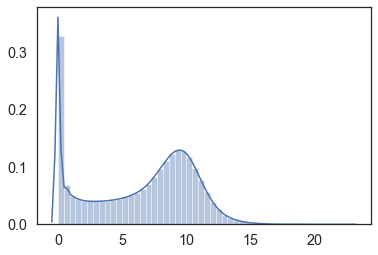

In [17]:
sns.distplot(rnaseq)

In [18]:
clinical = pd.merge(clinical, rnaseq, left_on='Patient Identifier', right_index=True)

In [19]:
clinical.to_csv('./clinical.csv', index=False)

In [20]:
PDE1C = pd.DataFrame(clinical['PDE1C'])

In [21]:
mir133a1 = pd.DataFrame(clinical2['hsa-mir-133a-1'])
mir133a2 = pd.DataFrame(clinical2['hsa-mir-133a-2'])
mir133b = pd.DataFrame(clinical2['hsa-mir-133b'])

In [22]:
control = clinical['Person Neoplasm Status'] == 'TUMOR FREE'
control = pd.DataFrame(control.apply(lambda x: 'control' if x==True else 'OSCC'))

In [27]:
mir133a1 = pd.merge(mir133a1, control, left_index=True, right_index=True)
mir133a1.columns = ['value', 'name']

mir133a2 = pd.merge(mir133a2, control, left_index=True, right_index=True)
mir133a2.columns = ['value', 'name']

mir133b = pd.merge(mir133b, control, left_index=True, right_index=True)
mir133b.columns = ['value', 'name']

In [29]:
PDE1C = pd.concat([PDE1C, control], axis=1)
PDE1C.columns = ['value', 'name']

In [38]:
mir133a1.to_csv('./hsa-mir-133a-1.csv', index=False)
mir133a2.to_csv('./hsa-mir-133a-2.csv', index=False)
mir133b.to_csv('./hsa-mir-133b.csv', index=False)

In [39]:
PDE1C.to_csv('./PDE1C.csv', index=False)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

control v.s. OSCC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.872e-01 U_stat=8.486e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

control v.s. OSCC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.872e-01 U_stat=8.486e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

control v.s. OSCC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.116e-01 U_stat=8.902e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.0

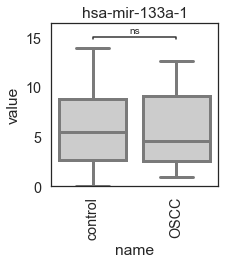

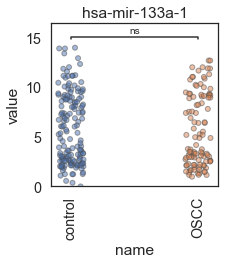

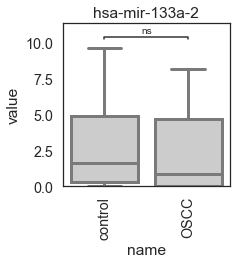

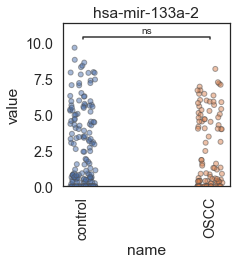

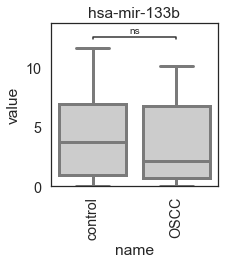

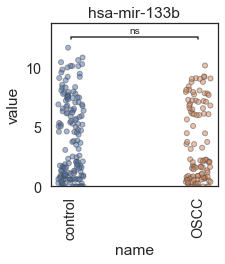

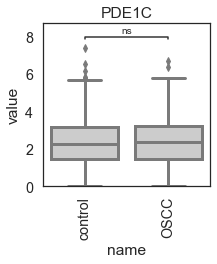

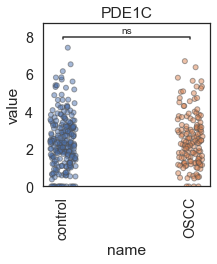

In [57]:
dfs = ['hsa-mir-133a-1', 'hsa-mir-133a-2', 'hsa-mir-133b', 'PDE1C']
for k in dfs:
    table = pd.read_csv('./%s.csv' %k)
    
    temp = []
    
    gene = [temp]
    name = ['boxplot']

    for i in range(0, len(gene)):
        dia = table['name'] == ('control')
        rel = table['name'] == ('OSCC')
        gene[i] = table[dia].append(table[rel])
        
    for i in range(0,len(gene)):
        plt.subplots(figsize = (3, 3))

        f1 = sns.boxplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], color="0.8", linewidth = 3)
        f1.set_ylim(0, gene[i]['value'].max())
        f1.set_title('%s' %k)
        plt.xticks(rotation=90)
        
        add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                    box_pairs=[(("control"), ("OSCC"))
                                ],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

        plt.savefig('./%s_%s_box.png' %(k, name[i]), dpi=300, bbox_inches='tight')
        
        plt.subplots(figsize = (3, 3))
        f2 = sns.stripplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], jitter=True, alpha=0.5, linewidth=1)
        f2.set_ylim(0, gene[i]['value'].max())
        f2.set_title('%s' %k)
        plt.xticks(rotation=90)
        
        add_stat_annotation(f2, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                    box_pairs=[(("control"), ("OSCC"))
                                ],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

        plt.savefig('./%s_%s_strip.png' %(k, name[i]), dpi=300, bbox_inches='tight')

In [45]:
eset = clinical.loc[:,['PDE1C']]

In [46]:
surv_pset = clinical[['Overall Survival Status', 'Overall Survival (Months)']]

In [47]:
surv_target = pd.concat([surv_pset, eset], axis=1)
surv_target = surv_target.replace('[Not Available]', np.NaN)
surv_target = surv_target.replace('0:LIVING', 0)
surv_target = surv_target.replace('1:DECEASED', 1)
surv_target = surv_target.dropna(axis=0)

In [48]:
surv_target.to_csv('./surv_target.csv', index=False)
surv_target = pd.read_csv('./surv_target.csv')

In [49]:
tumor = clinical['Person Neoplasm Status'] == 'WITH TUMOR'

tumor = tumor.reset_index(drop=True)

surv_target = surv_target[tumor]

surv_target = surv_target.reset_index(drop=True)

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [50]:
surv_target.columns = ['Overall Survival Status','Overall Survival (Months)','PDE1C']

In [51]:
km_target = surv_target.copy()
km = pd.DataFrame()

for i in range(2,len(km_target.columns)):
    t = km_target[km_target.iloc[:,i] > km_target.iloc[:,i].median()]['Overall Survival (Months)']
    e = km_target[km_target.iloc[:,i] > km_target.iloc[:,i].median()]['Overall Survival Status']
    t1 = km_target[km_target.iloc[:,i] <= km_target.iloc[:,i].median()]['Overall Survival (Months)']
    e1 = km_target[km_target.iloc[:,i] <= km_target.iloc[:,i].median()]['Overall Survival Status']
    result = logrank_test(t,t1,event_observed_A=e,event_observed_B=e1)
    res = result.summary
    res['Unnamed: 0'] = km_target.columns[i]
    km=km.append(res)

km = km.reset_index(drop=True)
km.to_csv('./km.csv', index=False)

In [52]:
km['Unnamed: 0'] = ['PDE1C']

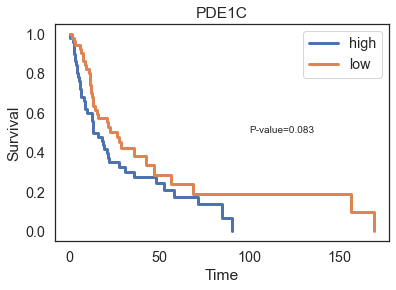

In [53]:
j=0
for i in (km['Unnamed: 0']):
    mask = km_target[i] > km_target[i].median()
    kmf.fit(km_target['Overall Survival (Months)'][mask], km_target['Overall Survival Status'][mask], label='high')
    ax = kmf.plot(ci_show=False, linewidth = 3)

    mask2 = km_target[i] <= km_target[i].median()
    kmf.fit(km_target['Overall Survival (Months)'][mask2], km_target['Overall Survival Status'][mask2], label='low')
    kmf.plot(ax=ax, ci_show=False, linewidth = 3)
    
    ax.text(100,0.5,'P-value=%.3f'% km['p'][j])
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Survival')
    ax.set_title('%s' %km['Unnamed: 0'][j])
    plt.savefig('./survival_%s.png' %km['Unnamed: 0'][j], dpi=300, bbox_inches='tight')
    j+=1

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


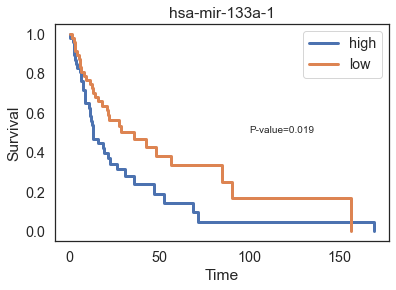

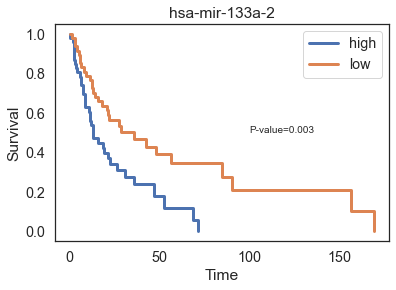

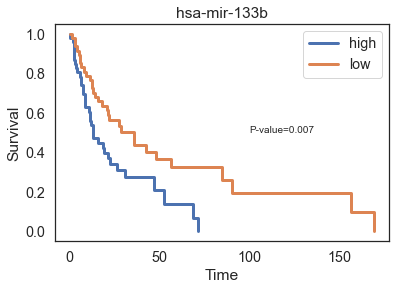

In [44]:
eset2 = clinical2.loc[:,['hsa-mir-133a-1','hsa-mir-133a-2','hsa-mir-133b']]

surv_pset2 = clinical2[['Overall Survival Status', 'Overall Survival (Months)']]

surv_target2 = pd.concat([surv_pset2, eset2], axis=1)
surv_target2 = surv_target2.replace('[Not Available]', np.NaN)
surv_target2 = surv_target2.replace('0:LIVING', 0)
surv_target2 = surv_target2.replace('1:DECEASED', 1)
surv_target2 = surv_target2.dropna(axis=0)

surv_target2.to_csv('./surv_target2.csv', index=False)
surv_target2 = pd.read_csv('./surv_target2.csv')

tumor2 = clinical2['Person Neoplasm Status'] == 'WITH TUMOR'

tumor2 = tumor2.reset_index(drop=True)

surv_target2 = surv_target2[tumor2]

surv_target2 = surv_target2.reset_index(drop=True)

km_target = surv_target2.copy()
km = pd.DataFrame()

for i in range(2,len(km_target.columns)):
    t = km_target[km_target.iloc[:,i] > km_target.iloc[:,i].median()]['Overall Survival (Months)']
    e = km_target[km_target.iloc[:,i] > km_target.iloc[:,i].median()]['Overall Survival Status']
    t1 = km_target[km_target.iloc[:,i] <= km_target.iloc[:,i].median()]['Overall Survival (Months)']
    e1 = km_target[km_target.iloc[:,i] <= km_target.iloc[:,i].median()]['Overall Survival Status']
    result = logrank_test(t,t1,event_observed_A=e,event_observed_B=e1)
    res = result.summary
    res['Unnamed: 0'] = km_target.columns[i]
    km=km.append(res)

km = km.reset_index(drop=True)
km.to_csv('./km.csv', index=False)

j=0
for i in (km['Unnamed: 0']):
    mask = km_target[i] > km_target[i].median()
    kmf.fit(km_target['Overall Survival (Months)'][mask], km_target['Overall Survival Status'][mask], label='high')
    ax = kmf.plot(ci_show=False, linewidth = 3)

    mask2 = km_target[i] <= km_target[i].median()
    kmf.fit(km_target['Overall Survival (Months)'][mask2], km_target['Overall Survival Status'][mask2], label='low')
    kmf.plot(ax=ax, ci_show=False, linewidth = 3)
    
    ax.text(100,0.5,'P-value=%.3f'% km['p'][j])
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Survival')
    ax.set_title('%s' %km['Unnamed: 0'][j])
    plt.savefig('./survival_%s.png' %km['Unnamed: 0'][j], dpi=300, bbox_inches='tight')
    j+=1